https://www.kaggle.com/datasets/arejet/simple-linear-regression/metadata

In [45]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
df = pd.read_csv('kc_house_data.csv')
df.info()
df = df[['price', 'bedrooms', 'sqft_living', 'bathrooms']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [47]:
df.describe()

,price,bedrooms,sqft_living,bathrooms
count,2.161300e+04,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2079.899736,2.114757
std,3.671272e+05,0.930062,918.440897,0.770163
min,7.500000e+04,0.000000,290.000000,0.000000
25%,3.219500e+05,3.000000,1427.000000,1.750000
50%,4.500000e+05,3.000000,1910.000000,2.250000
75%,6.450000e+05,4.000000,2550.000000,2.500000
max,7.700000e+06,33.000000,13540.000000,8.000000


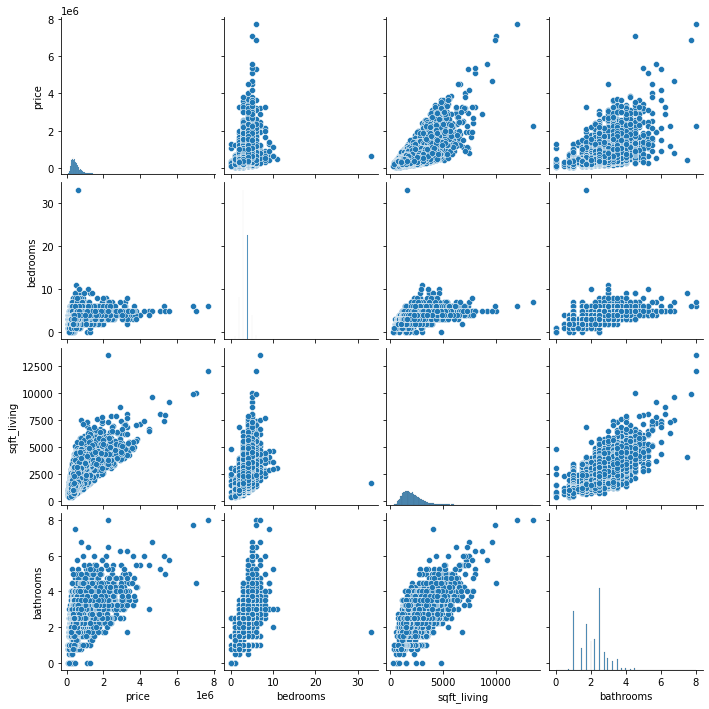

In [48]:
sns.pairplot(df)

<AxesSubplot:>

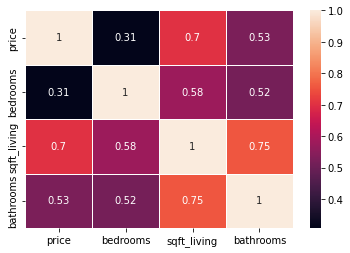

In [49]:
sns.heatmap(df.corr(), linewidth=0.5, annot=True)

In [50]:
x = df[['sqft_living', 'bathrooms']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)

In [51]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [52]:
print("Intercept: ", lm.intercept_)
print(lm.coef_)

print("Coeffs - sqft_living : ", lm.coef_[0])
print("Coeffs - bedrooms : ", lm.coef_[1])

Intercept:  -40111.73095503275
[  279.46634656 -1599.45643962]
Coeffs - sqft_living :  279.4663465553536
Coeffs - bedrooms :  -1599.4564396200535


Text(0, 0.5, 'Predicted values')

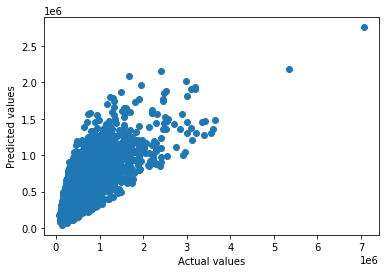

In [53]:
y_pred = lm.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [54]:
vari = metrics.explained_variance_score(y_test,y_pred)
r2score = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)

print('Variance: ',vari)
print('R2 score : ', r2score)
print('MSE: ',mse )

Variance:  0.49394218670375756
R2 score :  0.49350746657347533
MSE:  69697315442.6416
